In [1]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
from scipy.odr import *
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi
plt.style.reload_library()
plt.style.use(['science', 'grid'])
from scipy.odr import ODR, Model, Data, RealData
from scipy.optimize import curve_fit
import ipywidgets as widgets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [13]:
def LinearPlot(xdata,ydata,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    #plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    #plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    
    plt.scatter(xdata,ydata, color=color, marker=',', label='Peak: V = 450V')
    plt.legend(loc = 'upper right', fontsize = 12)
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    #plt.xticks(np.arange(min(xdata), max(xdata), (max(xdata)-min(xdata))/5))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axvline(x=450, color='red', linestyle='--')
    plt.savefig("Figures/figure.png")
    
# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)
    
def noiseRatio(param): #[L,D]
    return (param[0]-param[1])/param[1]

In [3]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1iYbA_X-BAgKxj-p5xsn6TMuqubb39IdXJCk7EbgtABg'
workSheetName = 'PreLab2'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :9]
#df['Error noise'] = df.apply(lambda x: uncertainty_var([x['Light Count Rate- L'], x['Dark Count Rate - D']], [x['L-Uncertainty'], x['D-Uncertainty']], noiseRatio), axis=1)
df

,Voltage (V),Uncertainty V (V),Light Count Rate- L,L-Uncertainty,Dark Count Rate - D,D-Uncertainty,Noise ratio,Unnamed: 7,Unnamed: 8
0,410,1,1062,32.588341,1,1.000000,1061.000000,NaN,NaN
1,420,1,2366,48.641546,1,1.000000,2365.000000,NaN,NaN
2,430,1,4045,63.600314,1,1.000000,4044.000000,NaN,NaN
3,440,1,6762,82.231381,1,1.000000,6761.000000,NaN,NaN
4,450,1,9041,95.084173,1,1.000000,9040.000000,NaN,NaN
5,460,1,11582,107.619701,2,1.414214,5790.000000,NaN,NaN
6,470,1,13768,117.337121,2,1.414214,6883.000000,NaN,NaN
7,480,1,15597,124.887950,3,1.732051,5198.000000,NaN,NaN
8,490,1,17482,132.219514,4,2.000000,4369.500000,NaN,NaN
9,510,1,19494,139.620915,6,2.449490,3248.000000,NaN,NaN


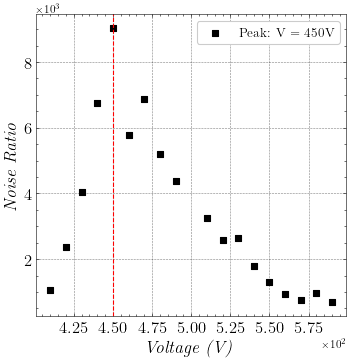

In [4]:
#xdata, ydata, error_x, error_y = df['Voltage (V)'], df['Noise ratio'], df['Uncertainty V (V)'], df['Error noise']
xdata, ydata = df['Voltage (V)'], df['Noise ratio']
LinearPlot(xdata,ydata,'black','Voltage (V)','Noise Ratio')

# Counting Statistics

In [126]:
def linear(x,a,b):
    return a*x+b

def proportionality(B,x):
    return B[0]*x

def LinearPlot(xdata,ydata,function,output,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    #plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    #plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    x = np.linspace(xdata.min(),xdata.max(),500)
    if function == proportionality:
        label = r'$\textit{Y = ' + str("{:.2e}".format(output[0])) + 'X}$'
        plt.plot(x,function(output,x),label = label, color=color)
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(output[0])) + 'X + ' + str("{:.2e}".format(output[1])) + '}$'
        plt.plot(x,function(x,output[0],output[1]),label = label, color=color)
    plt.scatter(xdata,ydata, color='black', marker=',')
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.legend(prop={'size': 12}, loc=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")

In [133]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1iYbA_X-BAgKxj-p5xsn6TMuqubb39IdXJCk7EbgtABg'
workSheetName = 'Counting_Stats'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , 21:30]
#df['Error noise'] = df.apply(lambda x: uncertainty_var([x['Light Count Rate- L'], x['Dark Count Rate - D']], [x['L-Uncertainty'], x['D-Uncertainty']], noiseRatio), axis=1)
df

,Sigma (int=1),Avg N (int=1),Sqrt(N)/N,Ln(Sigma),Ln(Avrg N),Sigma (int=4),Avg N (int=4),Sqrt(N)/N.1,Ln(Sigma).1
0,8.844961,103.3,9.84%,2.179848,4.637637,20.715265,637.3,3.96%,3.030871
1,17.958285,373.5,5.17%,2.888052,5.922918,23.754532,1871.5,2.31%,3.167773
2,22.912636,1301.9,2.77%,3.131689,7.171580,43.443961,4860.6,1.43%,3.771472
3,27.753879,2741.5,1.91%,3.323376,7.916260,96.765467,10440.0,0.98%,4.572290
4,80.883249,4618.9,1.47%,4.393007,8.437912,163.440951,18420.5,0.74%,5.096452
5,84.191646,8132.3,1.11%,4.433096,9.003599,188.635333,31801.8,0.56%,5.239816
6,89.616715,12344.6,0.90%,4.495542,9.420974,173.693088,50484.8,0.45%,5.157290
7,NaN,NaN,NaN,3.030871,6.457241,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,3.167773,7.534496,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,3.771472,8.488917,NaN,NaN,NaN,NaN


In [147]:
xdata, ydata = df['Ln(Avrg N)'], df['Ln(Sigma)']
parameters, covariance = opt.curve_fit(linear, xdata, ydata)
perr = np.sqrt(np.diag(covariance))

Slope = 0.5354031378092071 ± 0.04210980973348286
Intercept = -0.4879660625961102 ± 0.3539425989763272


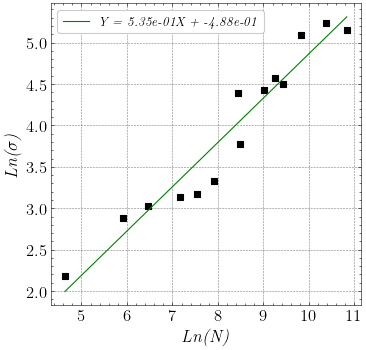

In [148]:
LinearPlot(xdata,ydata,linear,parameters,'green','Ln(N)','Ln($\sigma$)')
print('Slope = ' + str(parameters[0]) + ' ± ' + str(perr[0]))
print('Intercept = ' + str(parameters[1]) + ' ± ' + str(perr[1]))

Slope = 0.8452667826184952 ± 0.05616835304138571


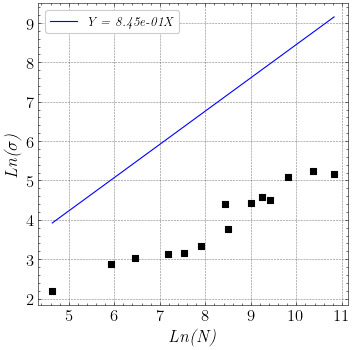

In [145]:
parameters, covariance = opt.curve_fit(proportionality, xdata, ydata)
perr = np.sqrt(np.diag(covariance))
LinearPlot(xdata,ydata,proportionality,parameters,'blue','Ln(N)','Ln($\sigma$)')
print('Slope = ' + str(parameters[0]) + ' ± ' + str(perr[0]))